# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [62]:
# Import numpy and pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 10)
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


In [4]:
sensor.columns = ['attitude_roll', 'attitude_pitch', 'attitude_yaw', 'gravity_x', 'gravity_y', 'gravity_z', 'rotationRate_x', 'rotationRate_y', 'rotationRate_z', 'userAcceleration_x', 'userAcceleration_y', 'userAcceleration_z']
sensor.columns

Index(['attitude_roll', 'attitude_pitch', 'attitude_yaw', 'gravity_x',
       'gravity_y', 'gravity_z', 'rotationRate_x', 'rotationRate_y',
       'rotationRate_z', 'userAcceleration_x', 'userAcceleration_y',
       'userAcceleration_z'],
      dtype='object')

Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
# Your code here:
sensor.isnull().sum()


attitude_roll         0
attitude_pitch        0
attitude_yaw          0
gravity_x             0
gravity_y             0
gravity_z             0
rotationRate_x        0
rotationRate_y        0
rotationRate_z        0
userAcceleration_x    0
userAcceleration_y    0
userAcceleration_z    0
dtype: int64

How many rows and columns are in our data?

In [6]:
# Your code here
print(f"columns: {sensor.shape[1]}")
print("rows: " + str(sensor.shape[0]))

columns: 12
rows: 1751


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [8]:
# Your code here:
index = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=sensor.shape[0])
index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [9]:
# Your code here:
sensor.index = pd.DatetimeIndex(index,freq="infer")

In [10]:
sensor.head()

,attitude_roll,attitude_pitch,attitude_yaw,gravity_x,gravity_y,gravity_z,rotationRate_x,rotationRate_y,rotationRate_z,userAcceleration_x,userAcceleration_y,userAcceleration_z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

<ipython-input-11-06cd735b7983>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  descompose = seasonal_decompose(sensor["userAcceleration_x"], model="additive", freq=60).plot()


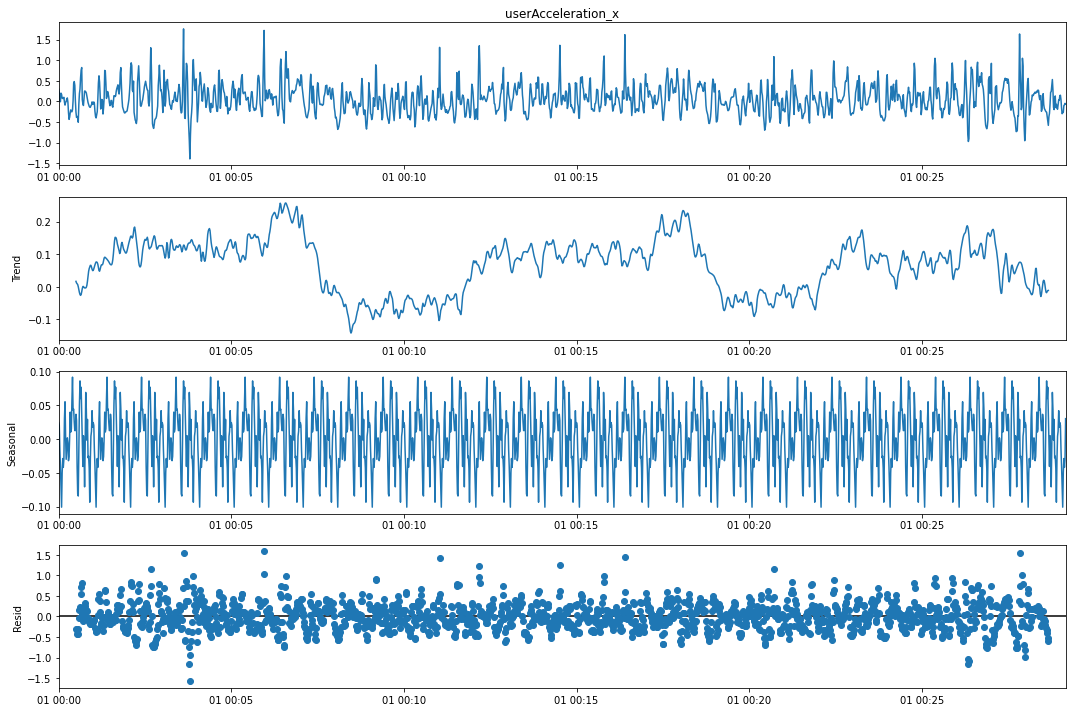

In [11]:
descompose = seasonal_decompose(sensor["userAcceleration_x"], model="additive", freq=60).plot()


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

<ipython-input-12-51954c39c277>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose2 = seasonal_decompose(sensor["rotationRate_x"], model="additive", freq=60).plot()


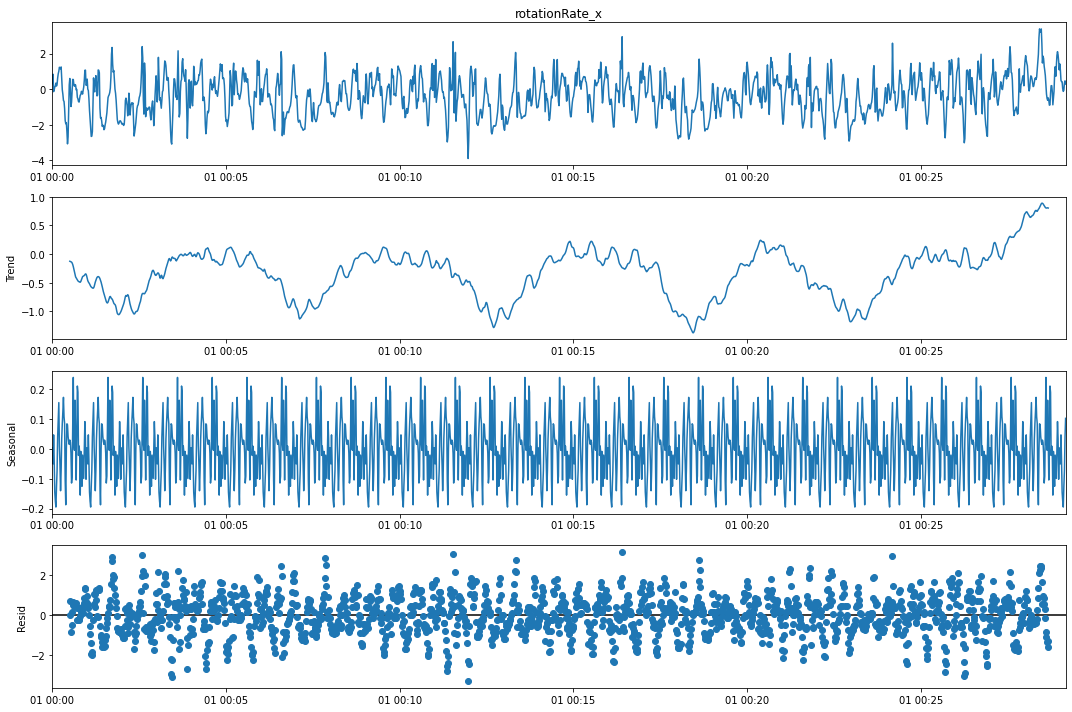

In [12]:
decompose2 = seasonal_decompose(sensor["rotationRate_x"], model="additive", freq=60).plot()


# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

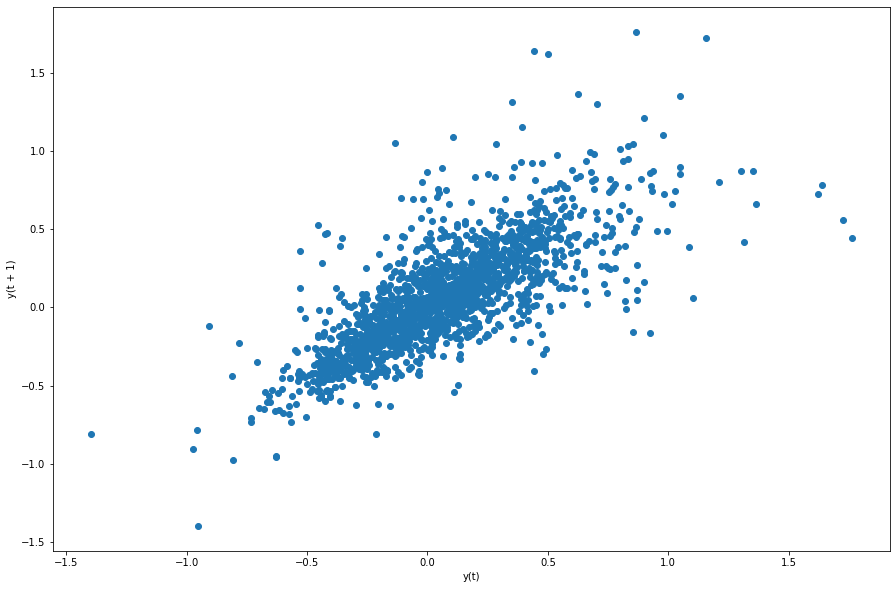

In [34]:
# Your code here:
pd.plotting.lag_plot(sensor["userAcceleration_x"], lag=1)

Create a lag plot for `rotationRate.x`

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

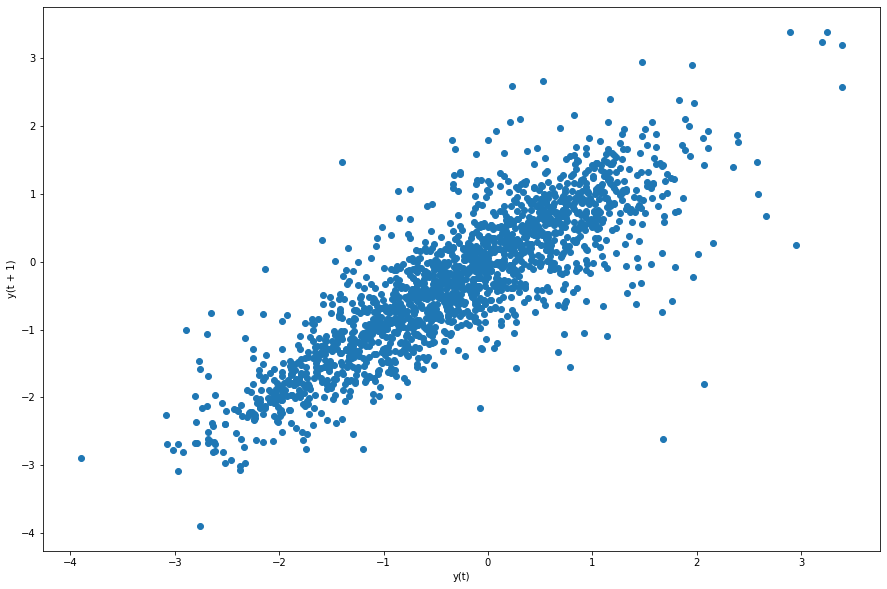

In [35]:
# Your code here:
pd.plotting.lag_plot(sensor["rotationRate_x"], lag=1)

What are your conclusions from both visualizations?

###### Your conclusions here:
Al ver la forma que presenta la mayoria de los puntos diria que existe una tendencia ascendente en los datos, aunque podemos ver que tambien hay muchos datos dispersos por la grafica.


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [37]:
# Your code here:
res = adfuller(sensor["userAcceleration_x"])
res

(-17.95799408616976,
 2.823439483037483e-30,
 4,
 1746,
 {'1%': -3.434100824760071,
  '5%': -2.863196780129223,
  '10%': -2.5676520210882936},
 -727.6140124402791)

In [38]:
res = adfuller(sensor["rotationRate_x"])
res

(-5.269860625086415,
 6.3202303359123905e-06,
 25,
 1725,
 {'1%': -3.4341465551936534,
  '5%': -2.863216966926812,
  '10%': -2.567662770090317},
 2619.6049719981947)

What are your conclusions from this test?

##### Your conclusions here:
En Ambos casos el valor de la métrica de la estadistica es menor que el de las tablas, por lo que podemos rechazar la hipotesis nula y quedarnos con la hipotesis alternativa


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

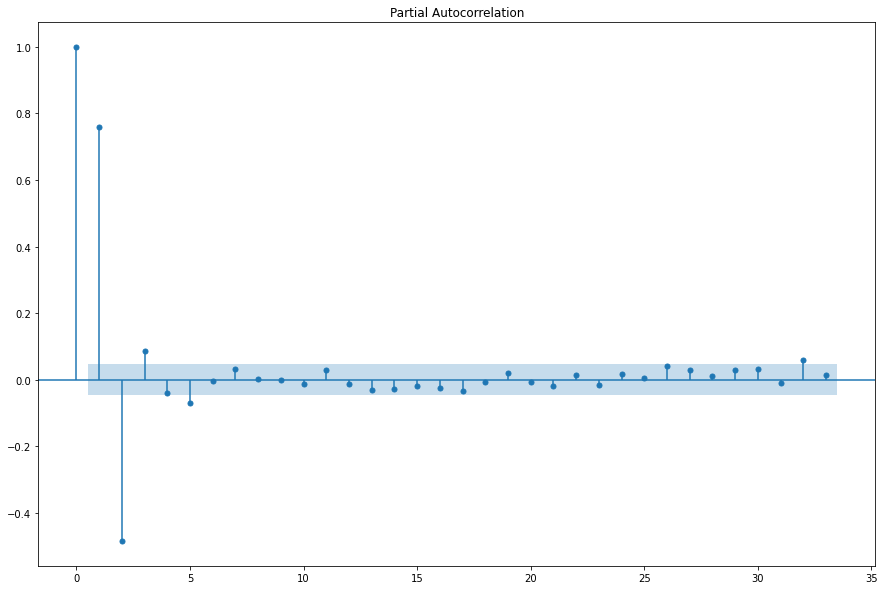

In [58]:
#AR
plot_pacf(sensor["userAcceleration_x"]);

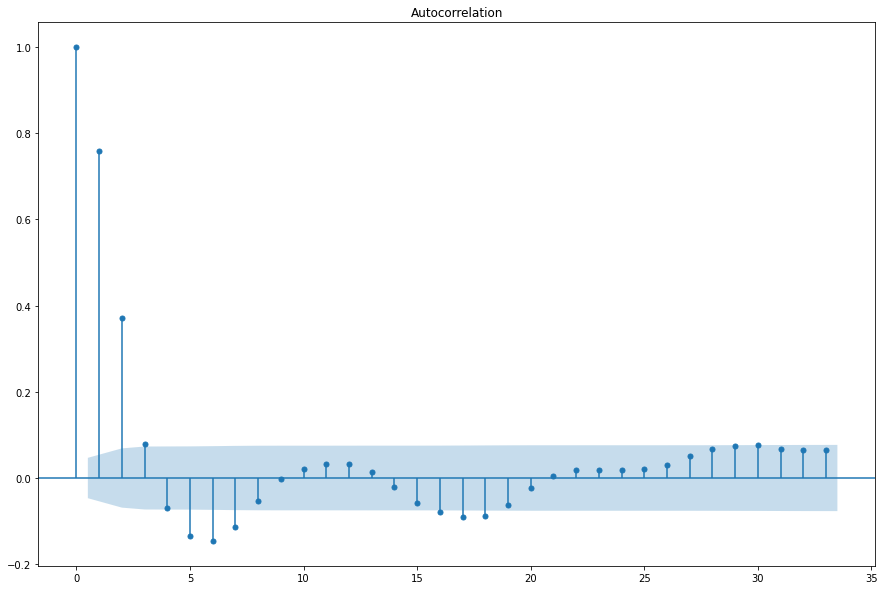

In [64]:
#MA
plot_acf(sensor["userAcceleration_x"]);

In [41]:
# Your code here:
#ultimas 10 observaciones
test = sensor["userAcceleration_x"].iloc[-10:]
#Resto de observaciones
train = sensor["userAcceleration_x"].iloc[:-10]

In [65]:
train_model = ARMA(train, order=(2, 1))
train_model_fit = train_model.fit(disp=-1)
print(train_model_fit.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:     userAcceleration_x   No. Observations:                 1741
Model:                     ARMA(2, 1)   Log Likelihood                 373.401
Method:                       css-mle   S.D. of innovations              0.195
Date:                Thu, 18 Feb 2021   AIC                           -736.803
Time:                        20:40:42   BIC                           -709.492
Sample:                    01-01-2018   HQIC                          -726.704
                         - 01-01-2018                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0637      0.014      4.503      0.000       0.036       0.091
ar.L1.userAcceleration_x     0.9882      0.044     22.639      0.000       0.903       1.

In [72]:
len(train), len(test)

(1741, 10)

In [73]:
pred = train_model.predict(len(train),len(train)-len(test))
#No entiendo por que no me deja,

ValueError: could not broadcast input array from shape (0,1) into shape (1,1)

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [ ]:
# Your code here:
